# Problem Statement

This time we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Lets check the data and get some general information**

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
titanic_test = pd.read_csv('titanic_test.csv')

In [5]:
train.info(), titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- survival: 0 = no, 1 = yes
- pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
- name: self explanatory
- sex: self explanatory
- age: self explanatory
- sibsp = nr of sibilings / spouses abroad
- parch = nr of parents / children abroad
- ticket = self explanatory
- fare = passenger fare
- cabin = self explanatory
- embarked = port of embarkment --> C = Chernourg, Q = Queenstown, S = Southhampton
- survived = out target

# Exploration

**The general idea for this dataset is to just visualise some aspects of it and understand**

 

**Check any Nan values exist**

<AxesSubplot:>

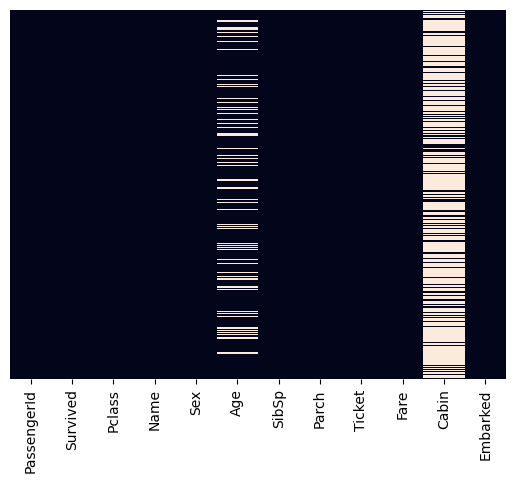

In [8]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

**Looks like some of the data is missing at Age, and a lot of data missing at Cabin**

In [9]:
(train.isnull() | train.empty | train.isna()).sum() # they all same

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [11]:
train['Age'].isnull().values.sum()/len(train['Age'])

0.19865319865319866

**Alternatively**

In [12]:
def show_percentage_nan(colName, dtFrame):
    perc = (dtFrame[colName].isnull().sum() / dtFrame.shape[0])
    print(f"Percent of missing ''{colName}'' records is {round(perc * 100,3)} %")

In [13]:
for col in ['Age', 'Cabin']:
    show_percentage_nan(col,train)

Percent of missing ''Age'' records is 19.865 %
Percent of missing ''Cabin'' records is 77.104 %


**Almost %20 is missing at age, we can "impute" those values, we should better drop Cabin**

<AxesSubplot:xlabel='Survived', ylabel='count'>

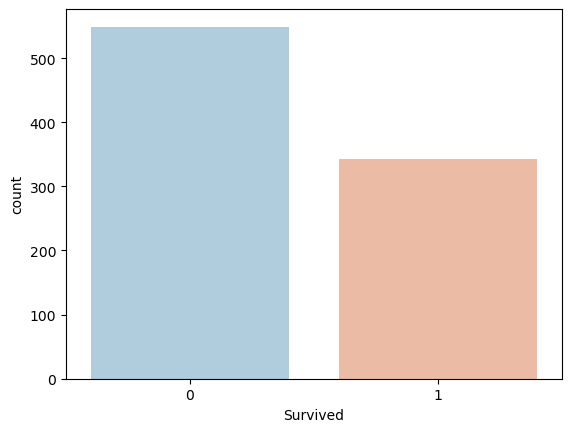

In [14]:
sns.countplot(data=train, x='Survived', palette='RdBu_r')

**Ideally for a classification ML model, the labels should be balanced. This is important for the accuracy of the model.In this case we have %45 survived and %55 not survived.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

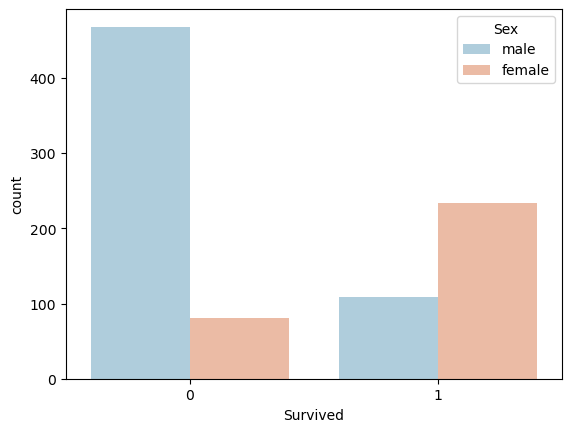

In [15]:
sns.countplot(data=train, x='Survived', hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

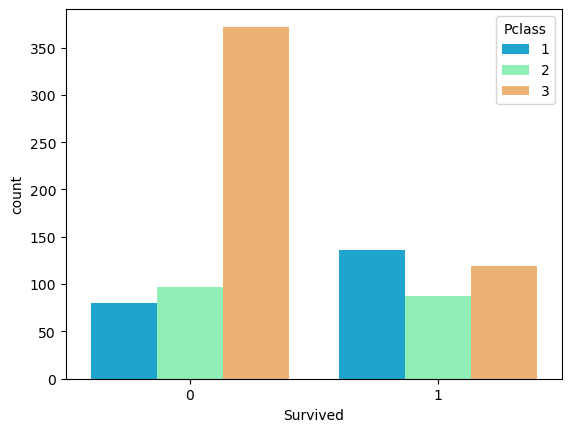

In [16]:
sns.countplot(data=train, x='Survived', hue='Pclass', palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

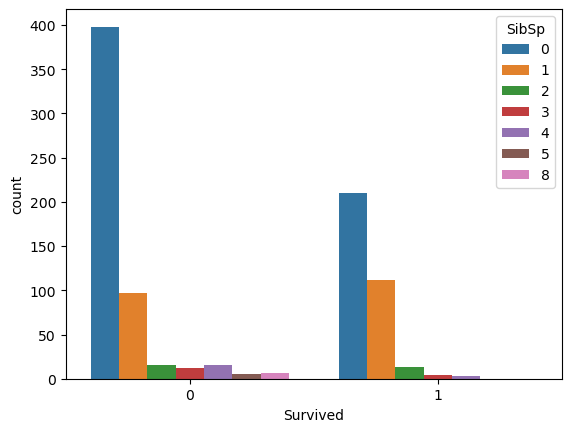

In [17]:
sns.countplot(data=train, x='Survived', hue='SibSp')

<AxesSubplot:xlabel='Survived', ylabel='count'>

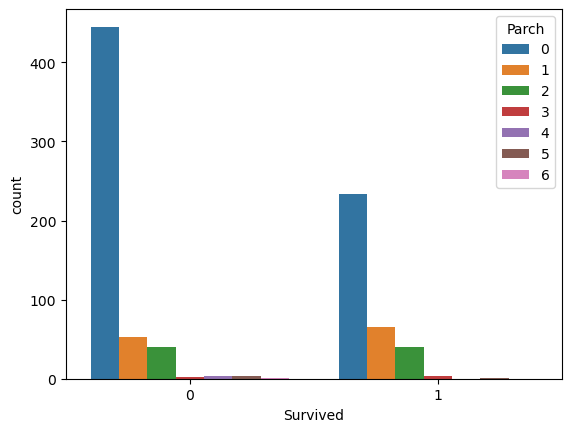

In [18]:
sns.countplot(data=train, x='Survived', hue='Parch')

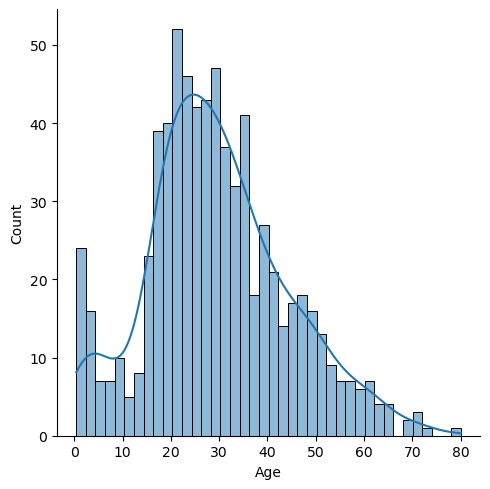

In [19]:
sns.displot(train['Age'].dropna(),kde=True,bins=40)

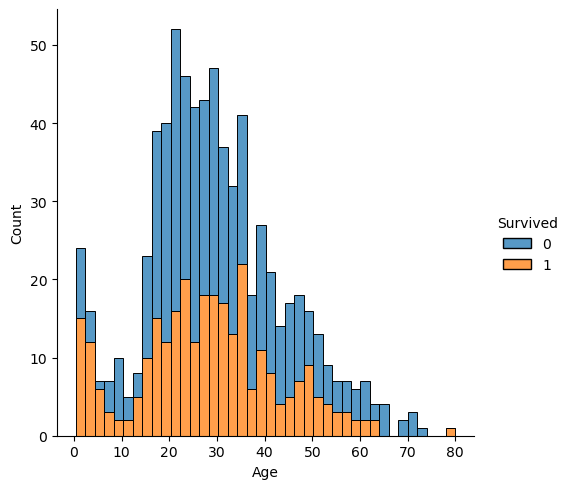

In [20]:
sns.displot(data=train,x='Age',bins=40, hue='Survived', multiple='stack')

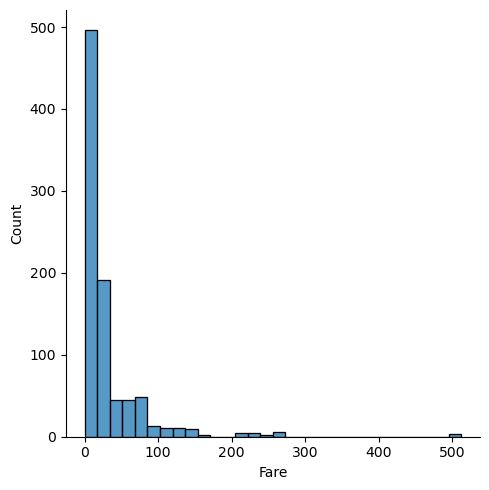

In [21]:
sns.displot(train['Fare'], kde=False, bins=30)

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). Lets try to identify how can we get that missing Age information

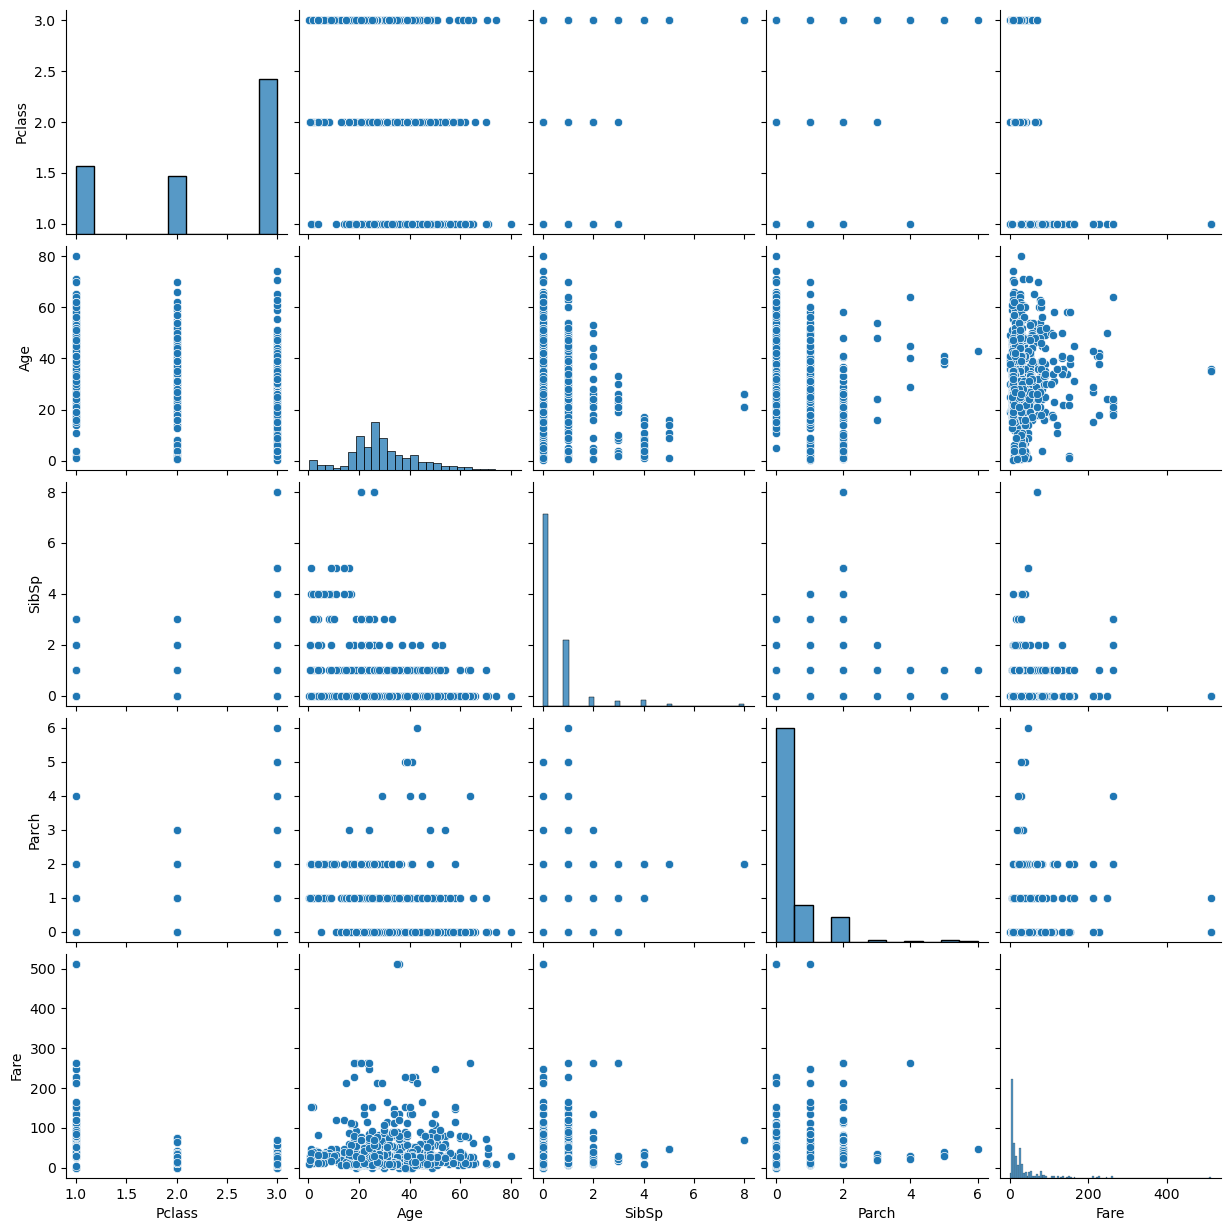

In [122]:
#train.drop(['PassengerId', 'Survived', 'Ticket'],axis=1)
sns.pairplot(data=train.drop(['PassengerId', 'Survived', 'Ticket'],axis=1))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

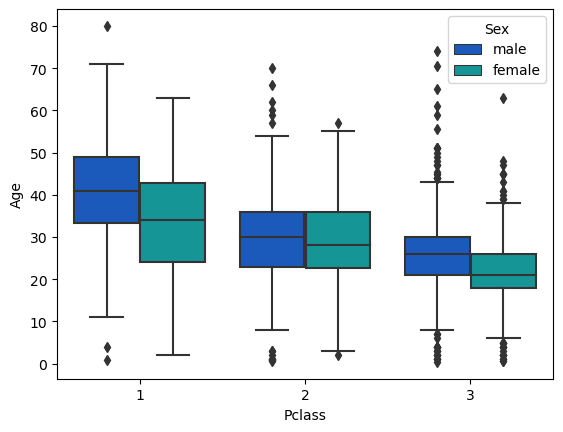

In [31]:
sns.boxplot(data=train, x='Pclass', y='Age',hue='Sex', palette='winter')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

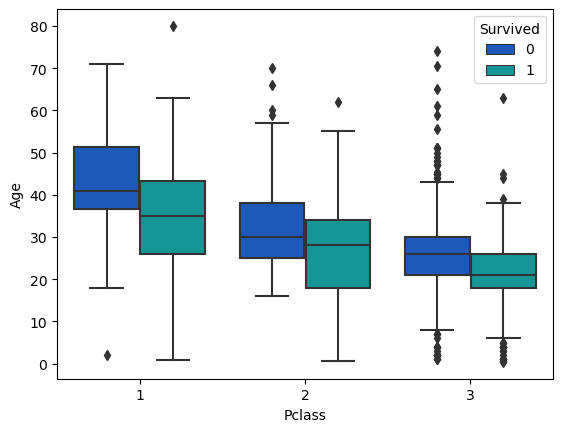

In [35]:
sns.boxplot(data=train, x='Pclass', y='Age',hue='Survived', palette='winter')

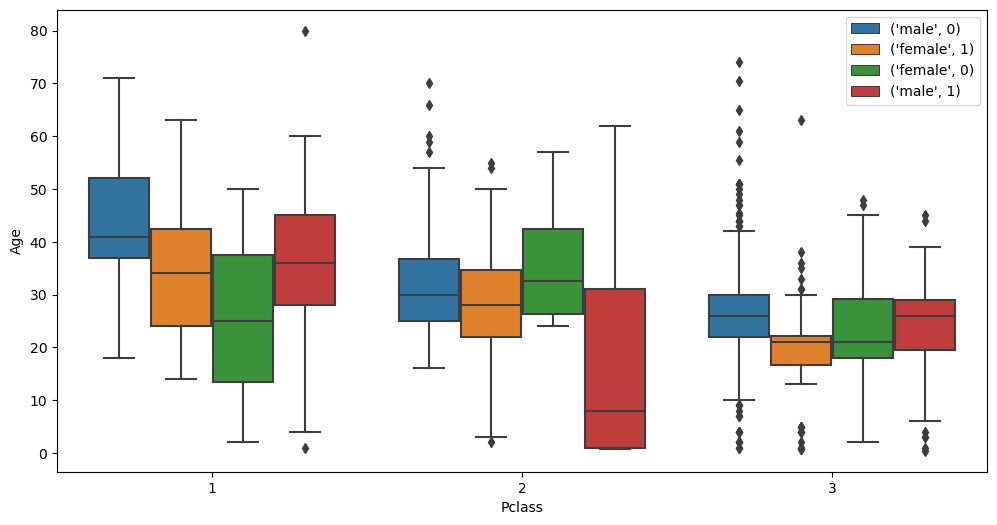

In [118]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=train, x="Pclass", y="Age", hue=train[['Sex', 'Survived']].apply(tuple, axis=1))



**Creating a age dictionary considering the class and the sex. The simple approach, commented script, will just put the mean age value**

In [25]:
mean_age_dict = {}
for sex in ['male', 'female']:
    for Pclass in [1, 2, 3]: 
        mean_age_dict[sex,Pclass]=int(train[(train['Pclass'] == Pclass) & (train['Sex'] == sex)]['Age'].mean())
        
print(mean_age_dict)
#train['Age'].fillna(value = train['age'].mean(), inplace=True)

{('male', 1): 41, ('male', 2): 30, ('male', 3): 26, ('female', 1): 34, ('female', 2): 28, ('female', 3): 21}


In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        return mean_age_dict[Sex,Pclass] 
    else:
        return Age

In [27]:
train['Age'] = train[['Age','Pclass','Sex']].apply(impute_age,axis=1)

**This should fill up the NaN data**

<AxesSubplot:>

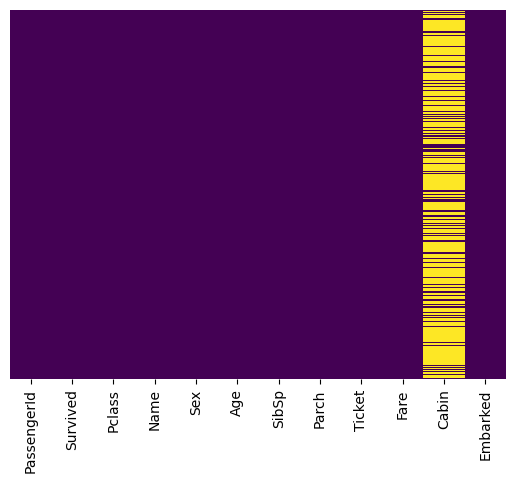

In [28]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [28]:
train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

**Just in case if there is any more NaN elements**

In [29]:
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)

# Converting Categorical Features

Idea is to convert objects (strings) to dummy variables using pandas, below 'Name', 'Sex', 'Ticket', 'Embarked' looks to be to columns to apply dummy. 'Name' and 'Ticket' are rather hard to make something out of it at this stage, so we will pass.

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [31]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

**For a categorical data drop_first is simplifies the dummy variables. For example, sex is either female or male, so if male == 1 (True) that means it can not be female. Similarly, the port can be C, Q, or S, so if Q and S is == 0 that means it is C.**

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
train["Embarked"] = labelencoder_X.fit_transform(train['Embarked'])


In [33]:
#from sklearn.preprocessing import OneHotEncoder
#result = OneHotEncoder().fit_transform(train["Sex"].values.reshape(-1, 1)).toarray()
#train[["Female22", "Male22"]] = pd.DataFrame(result, index = train.index)
#train.drop(["sex"], axis=1, inplace=True)
#train[["Female22","Male22"]]

In [34]:
embark.head(), sex.head()

(   Q  S
 0  0  1
 1  0  0
 2  0  1
 3  0  1
 4  0  1,
    male
 0     1
 1     0
 2     0
 3     0
 4     1)

In [35]:
train.drop(['PassengerId','Sex','Name','Ticket'],axis=1,inplace=True)
#train = pd.concat([train,sex,embark],axis=1)
train = pd.concat([train,sex],axis=1)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int32  
 7   male      889 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(1)
memory usage: 53.0 KB


In [37]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,1
887,1,1,19.0,0,0,30.0000,2,0
888,0,3,21.0,1,2,23.4500,2,0
889,1,1,26.0,0,0,30.0000,0,1


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training

In [39]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

## Evaluation


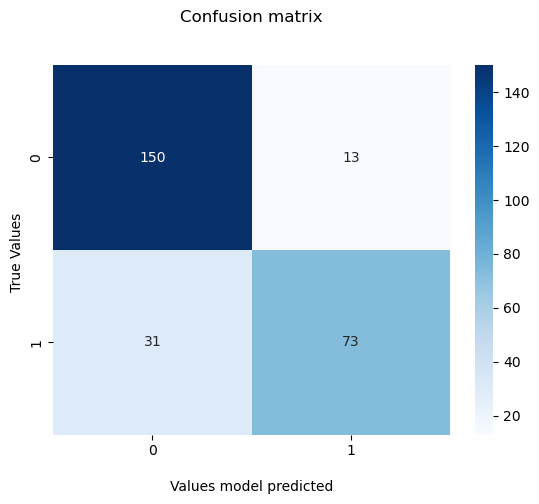

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [41]:
from sklearn.metrics import classification_report, accuracy_score

predictions = logmodel.predict(X_test)

confusionMatrix = pd.crosstab(y_test, predictions)
classificationReport = classification_report(y_test, predictions)

fx = sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()
print(f"Classification Report\n{classificationReport}")

**Remember, we said, ideally for a classification ML model, the labels should be balanced. This case we have %45 survived and %55 not survived.Accuracy is a good measure of start if all classes are balanced. Precision and recall is more important when classes are not balanced. f1-score is combination of precision and recall**

In [42]:
print("The accuracy is", round(accuracy_score(predictions, y_test) * 100,2))

The accuracy is 83.52


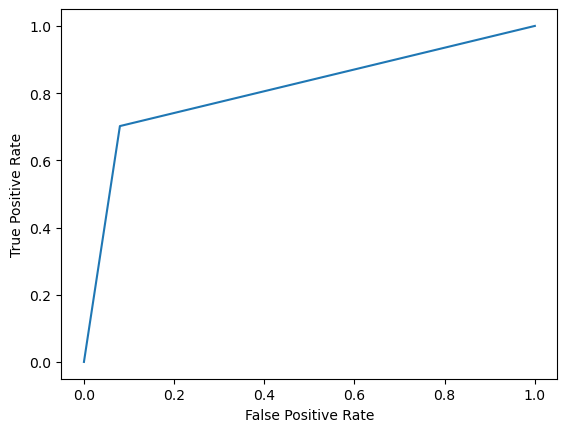

In [43]:
from sklearn import metrics

y_pred_proba = logmodel.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, predictions)

plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Bonus: what happens when you also apply pd.get_dummies() to Pclass

In [44]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)
pclass
pclass.rename({2: '2', 3: '3'}, axis=1)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [71]:
train.drop('Pclass',axis=1, inplace=True)
train2 = pd.concat([train,pclass],axis=1)
train2.columns = train2.columns.astype(str)
train2

,Survived,Age,SibSp,Parch,Fare,Embarked,male,2,3,2,3
0,0,22.0,1,0,7.2500,2,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,2,0,0,1,0,1
3,1,35.0,1,0,53.1000,2,0,0,0,0,0
4,0,35.0,0,0,8.0500,2,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,2,1,1,0,1,0
887,1,19.0,0,0,30.0000,2,0,0,0,0,0
888,0,21.0,1,2,23.4500,2,0,0,1,0,1
889,1,26.0,0,0,30.0000,0,1,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(train2.drop(['Survived'],axis=1), 
                                                    train2['Survived'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression()
logmodel2.fit(X_train2, y_train2)

C:\Users\user.FBTSB1\anaconda3\envs\udemy1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

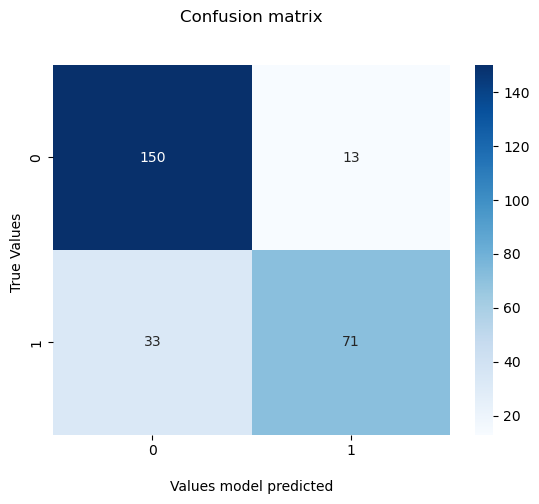

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [73]:
from sklearn.metrics import classification_report, accuracy_score

predictions2 = logmodel2.predict(X_test2)

confusionMatrix2 = pd.crosstab(y_test2, predictions2)
classificationReport2 = classification_report(y_test2, predictions2)

fx = sns.heatmap(confusionMatrix2, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()
print(f"Classification Report\n{classificationReport2}")